 Part A: IMDb Movie Review Sentiment Analysis

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter

In [16]:
# Load IMDb Dataset
imdb = pd.read_csv('Imdb.csv')

In [17]:
# Data Exploration
print("First 5 Rows:\n", imdb.head())
print("\nDataset Info:\n")
print(imdb.info())
print("\nClass Distribution:\n", imdb['sentiment'].value_counts())

First 5 Rows:
                                               review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None

Class Distribution:
 sentiment
positive    25000
negative    25000
Name: count, dtype: int64


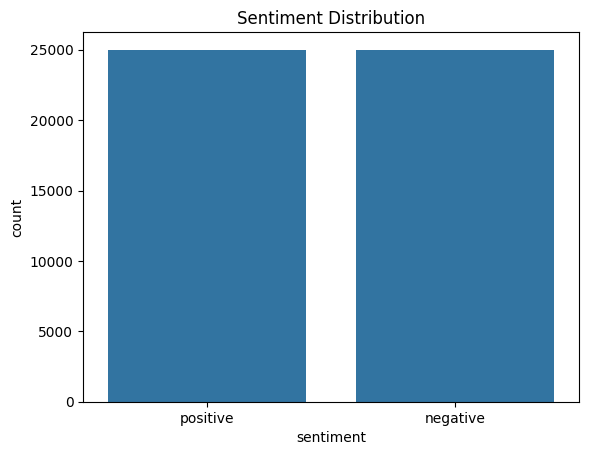

In [18]:
# Visualizing Sentiment Distribution
sns.countplot(x='sentiment', data=imdb)
plt.title("Sentiment Distribution")
plt.show()


Review Length Statistics:
 count    50000.000000
mean       231.146580
std        171.349956
min          1.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: review_length, dtype: float64


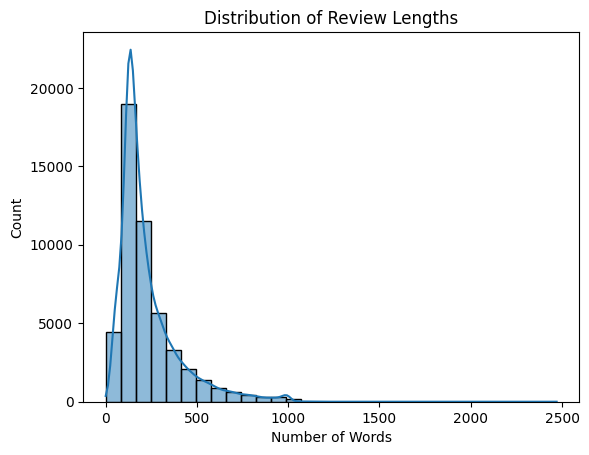

In [19]:
# Analyze Review Lengths
imdb['review_length'] = imdb['review'].apply(lambda x: len(str(x).split()))
print("\nReview Length Statistics:\n", imdb['review_length'].describe())
sns.histplot(imdb['review_length'], bins=30, kde=True)
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Words")
plt.show()

In [20]:
# Text Cleaning Function
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [21]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)                # Remove HTML
    text = re.sub(r'[^\w\s]', '', text)            # Remove Punctuation
    words = word_tokenize(text)                     # Tokenize
    words = [word for word in words if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    words = [stemmer.stem(word) for word in words]
    return " ".join(words)

In [22]:
# Apply Cleaning to Reviews
imdb['clean_review'] = imdb['review'].apply(clean_text)

In [23]:
# Display Top 20 Frequent Words
all_words = ' '.join(imdb['clean_review']).split()
word_freq = Counter(all_words).most_common(20)
print("\nMost Common Words:")
for word, freq in word_freq:
    print(f"{word}: {freq}")


Most Common Words:
movi: 98935
film: 92061
one: 52648
like: 43819
time: 29798
good: 28898
make: 28567
get: 27716
see: 27570
charact: 27566
watch: 27065
even: 24749
stori: 24218
would: 24001
realli: 22893
go: 22352
scene: 20695
show: 19395
look: 19197
well: 18952


In [24]:
# TF-IDF Feature Extraction
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(imdb['clean_review']).toarray()
y = imdb['sentiment'].map({'positive': 1, 'negative': 0})  # Encode Sentiment Labels

In [25]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Model Training and Evaluation
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Naive Bayes': MultinomialNB()
}


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



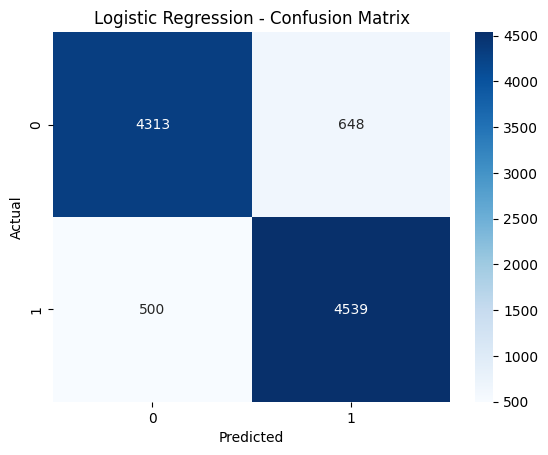


Model: Random Forest
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4961
           1       0.86      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



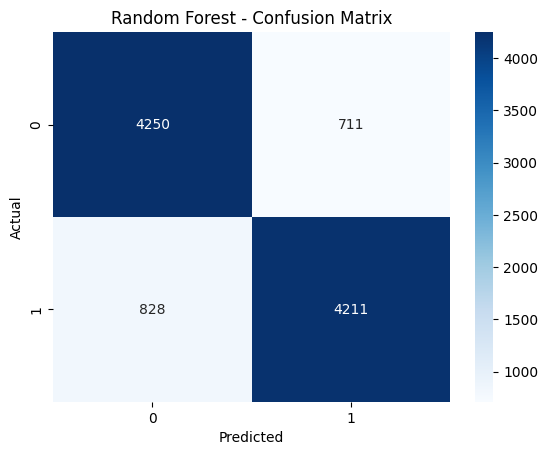


Model: Naive Bayes
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      4961
           1       0.84      0.86      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



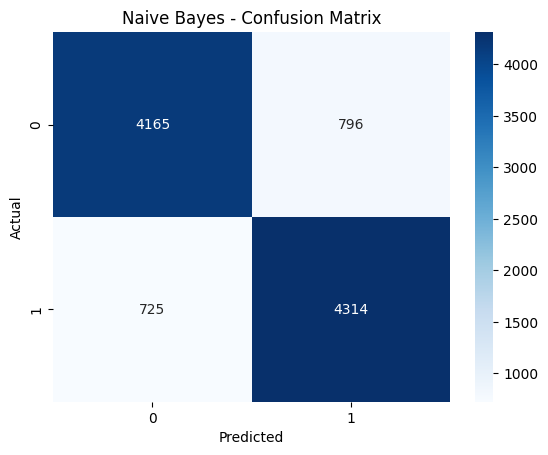

In [27]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nModel: {name}")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [28]:
# Cross-Validation (Logistic Regression)
log_reg = LogisticRegression(max_iter=1000)
cv_scores = cross_val_score(log_reg, X, y, cv=5, scoring='accuracy')
print("\nCross-Validation Accuracy Scores (Logistic Regression):", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


Cross-Validation Accuracy Scores (Logistic Regression): [0.8881 0.891  0.8849 0.882  0.882 ]
Mean CV Accuracy: 0.8855999999999999
